# 画图

In [1]:
%matplotlib notebook
import imp, time
from collections import Counter, OrderedDict, defaultdict, deque, namedtuple

import matplotlib.pyplot as plt
import numpy as np, sympy as sy
from sklearn.cluster import KMeans
from scipy import constants as const
from scipy.fftpack import fft, hilbert, ifft
from scipy.optimize import curve_fit
from scipy.optimize import least_squares as ls
from sympy import diff, symbols

import qulab.optimize
from qulab.storage import connect
from qulab.storage.schema import Record, base
from qulab.storage.utils import save

op = imp.reload(qulab.optimize)
connect.connect()

In [2]:
def read(title=None,which=0):
    
    if title is None:
        x = Record.objects.order_by('-finished_time')[which]
    else:
        x = Record.objects(title=title).order_by('-finished_time')[which]
    tags, comment, name = x['tags'], x['comment'], x['title']
    data, ID = base.from_pickle(x.datafield), x.id
    return data, ID, comment, tags, name

In [38]:
def write(phase=None,addr='mongodb',height=2,title=None,which=0,peak=110):
    if addr == 'mongodb':
        data, ID, comment, tags, name = read(title=title,which=which)
    else:
        d = np.load(addr)
        data, tags = (d['row'],d['col'],d['s']), d['tags']

    if len(data) == 2:
        num = len(data[0].T)
        if phase == 'phase': 
            fig, axes = plt.subplots(ncols=2,nrows=num,figsize=(9,height*num))
            fig.subplots_adjust(top=0.98,bottom=0.02,hspace=0.2)
            v = []
            for i in range(num): 
                f, s = data[0][:,i],data[1][:,i]
                v.append((f,s))
                if num != 1:
                    
                    axes[i][0].plot(f,abs(s))
                    axes[i][1].plot(f,np.angle(s))
                else:
                    axes[0].plot(f,abs(s))
                    axes[1].plot(f,np.angle(s))
        else:
            n = num // 2 + num % 2
            fig, axes = plt.subplots(ncols=2,nrows=n,figsize=(9,height*n))
            fig.subplots_adjust(top=0.9,bottom=0.1,hspace=0.5)
            v = []
            for i in range(num): 
                f, s = data[0][:,i],data[1][:,i]
                v.append((f,s))
                if n != 1:
                    axes[i//2][i%2].plot(f,abs(s))
                    #axes[i//2][i%2].set_title(name)
                else:
                    axes[i].plot(f,abs(s))
                    if addr == 'mongodb':
                        axes[i].set_title(name)
        return v,num,tags
    if len(data) == 3 :
        
        num = len(data[0].T)
        if phase == 'phase': 
            n = num // 2 + num % 2
            fig, axes = plt.subplots(ncols=2,nrows=num,figsize=(9,height*num))
            fig.subplots_adjust(top=0.9,bottom=0.1,hspace=0.5)
            v = []
            for i in range(num): 
                cols, rows, s= data[0][:,i], data[1][0,:], data[2][:,:,i]
                v.append((cols,rows,s))
                extent = [min(rows)/1e9,max(rows)/1e9,min(cols),max(cols)]
                if n != 1:
                    axes[i//2][i%2].imshow(abs(s),extent=extent,aspect='auto',origin='lower',interpolation='nearest')
                    #axes[i][1].imshow(np.angle(s),extent=extent,aspect='auto',origin='lower',interpolation='nearest')
                else:
                    #axes[0].imshow(abs(s),extent=extent,aspect='auto',origin='lower',interpolation='nearest')
                    axes[i].imshow(np.angle(s),extent=extent,aspect='auto',origin='lower',interpolation='nearest')
        else:
            n = num // 2 + num % 2
            fig, axes = plt.subplots(ncols=2,nrows=n,figsize=(9,height*n))
            fig.subplots_adjust(top=0.9,bottom=0.1,hspace=0.5)
            v = []
            for i in range(num): 
                cols, rows, s= data[0][:,i], data[1][0][:,0], data[2][:,:,i]

                s[np.abs(s) > peak] = s[np.abs(s)==np.min(np.abs(s))]
                v.append((cols,rows,s))
                extent = [min(rows)/1e9,max(rows)/1e9,min(cols),max(cols)]
                if n != 1:
                    axes[i//2][i%2].imshow(abs(s),extent=extent,aspect='auto',origin='lower',interpolation='nearest')
                    #axes[i//2][i%2].set_title(name)
                else:
                    axes[i].imshow(np.abs(s),extent=extent,aspect='auto',origin='lower',interpolation='nearest',animated=True)
                    axes[i].set_title(tags[0])
        return v,num,tags

In [63]:
x = np.array([0,1,2])
x[:] = 1

In [73]:
np.array([2,4])/np.array([2,2])

array([1., 2.])

# qubit工作点

In [5]:
atributte = ['q_name','inst','T_bias','specfunc','bias','zpulse','f_lo','delta','f_ex','delta_ex','power_ex','pi_len','T1']
qubit = namedtuple('qubit',atributte,defaults=[None]*len(atributte))

## 保存qubit工作点

In [170]:
qstate = []
def tuple2dict(q):
    for i in q:
        qstate.append(i._asdict())
    return qstate

bit = [q1,q2,q3,q4,q5,q6,q7,q8,q9,q10]
filepath = save('QubitState','qubitstate',state = tuple2dict(bit),base_path=r'D:\skzhao\file_name')
with open(r'D:\skzhao\file_name\file_name.txt', mode='a') as filename:
    filename.write(str(filepath))
    filename.write('\n')
print(filepath)

D:\skzhao\file_name\2020\0310\QubitState\qubitstate_20200310121359.npz


In [7]:
q3

qubit(q_name='q3', inst={'dc': 'dc06', 'z_awg': 'awg131', 'z_ch': 3, 'ex_awg': 'awg133', 'ex_ch': [3, 4], 'ex_lo': 'psg_ex1', 'com': 'com12'}, T_bias=[1.759, 0.068], specfunc=2.98687262994144 - 1.02629868128547*cos(0.876727600819897*pi*x + 2.96607490692315), bias=-0.22, zpulse=None, f_lo=array([6.54358e+09]), delta=array([50000000.]), f_ex=array([3.754e+09]), delta_ex=array([80000000.]), power_ex=50, pi_len=28, T1=23016.178849233776)

## 提取qubit工作点

In [6]:
fl = np.loadtxt(r'D:\skzhao\file_name\file_name.txt',dtype='str')
f = str(fl[-1])
data = np.load(f,allow_pickle=True)
def dict2tuple(q):
    bit = []
    for i,k in enumerate(q):
        attr = []
        for j in atributte:
            if j in k:
                attr.append(k[j])
            else:
                attr.append(None)
        globals()['q%d'%(i+1)] = qubit(*attr)

dict2tuple(data['state'])
print(f)

D:\skzhao\file_name\2020\0318\QubitState\qubitstate_20200318121518.npz


# 查看图形

<IPython.core.display.Javascript object>


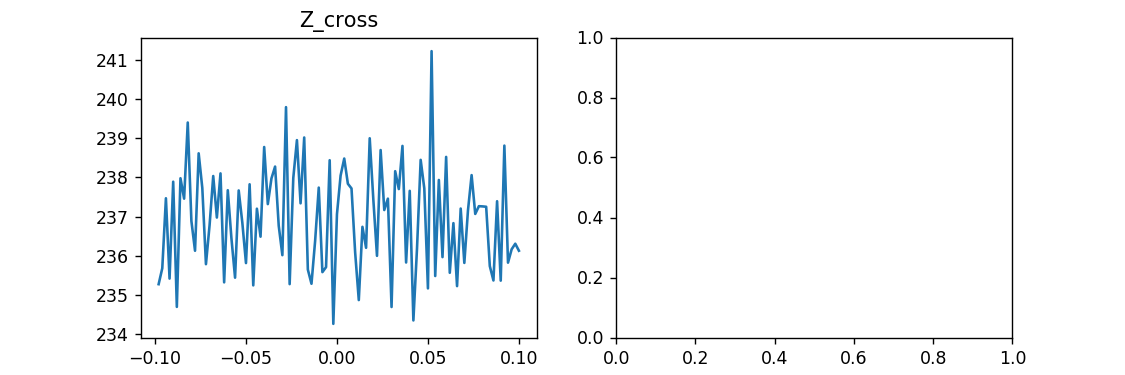

In [39]:
value,num,tags = write(height=3,which=3,peak=1120)

In [44]:
class qubitCollections():
    def __init__(self,qubits,q_target=None):
        self.qubits = {i.q_name:i for i in qubits}
        qstate = {}
        for i in self.qubits:
            qstate[i] = {'dc':0,'ex':0,'read':False}
        self.__setattr__('qstate',qstate)
        # if q_target != None:
        #     qasdict = self.qubits[q_target]._asdict()
        #     for i in qasdict:
        #         # if not hasattr(self,i):
        #         self.__setattr__(i,qasdict[i])
        # else:
        #     self.inst = {i.q_name:i.inst for i in qubits}
        #     self.q_name = 'allqubits'

        # self.f_lo = np.array([i.f_lo[0] for i in qubits])
        # self.f_ex = np.array([i.f_ex[0] for i in qubits])

    def qubitExecute(self,state=None):
        
        for i in state:
            self.qstate[i] = state[i]
            # self.__setattr__('qstate',self.qstate)

In [49]:
qubit1 = qubitCollections([q1,q2])

In [51]:
qubit1.qstate

{'q1': {'dc': 0, 'ex': 0, 'read': False},
 'q2': {'dc': 0, 'ex': 0, 'read': False}}

In [47]:
qubit.qubitExecute(state={'q1':{'dc':1,'ex':1,'read':True}})

In [56]:
def err(paras,x,y):
    A,B,p = paras
    return A*p**x+B-y
def guess(x,y):
    B = np.max(y)
    y = np.abs(y - np.max(y))
    mask = y > 0
    a = np.polyfit(x[mask], np.log(y[mask]), 1)
    return -np.exp(np.abs(a[1])), B, np.exp(np.abs(a[0]))

In [57]:
p0 = guess(x,y)
res = ls(err, p0, args=(x, y)) 
A,B,p = res.x
fig = plt.gcf()
ax = plt.getp(fig,'axes')
z = A*p**x+B
ax[0].plot(x,z)
ax[0].set_title('p=%f'%p)
plt.show()

# 拟合二维谱

<IPython.core.display.Javascript object>


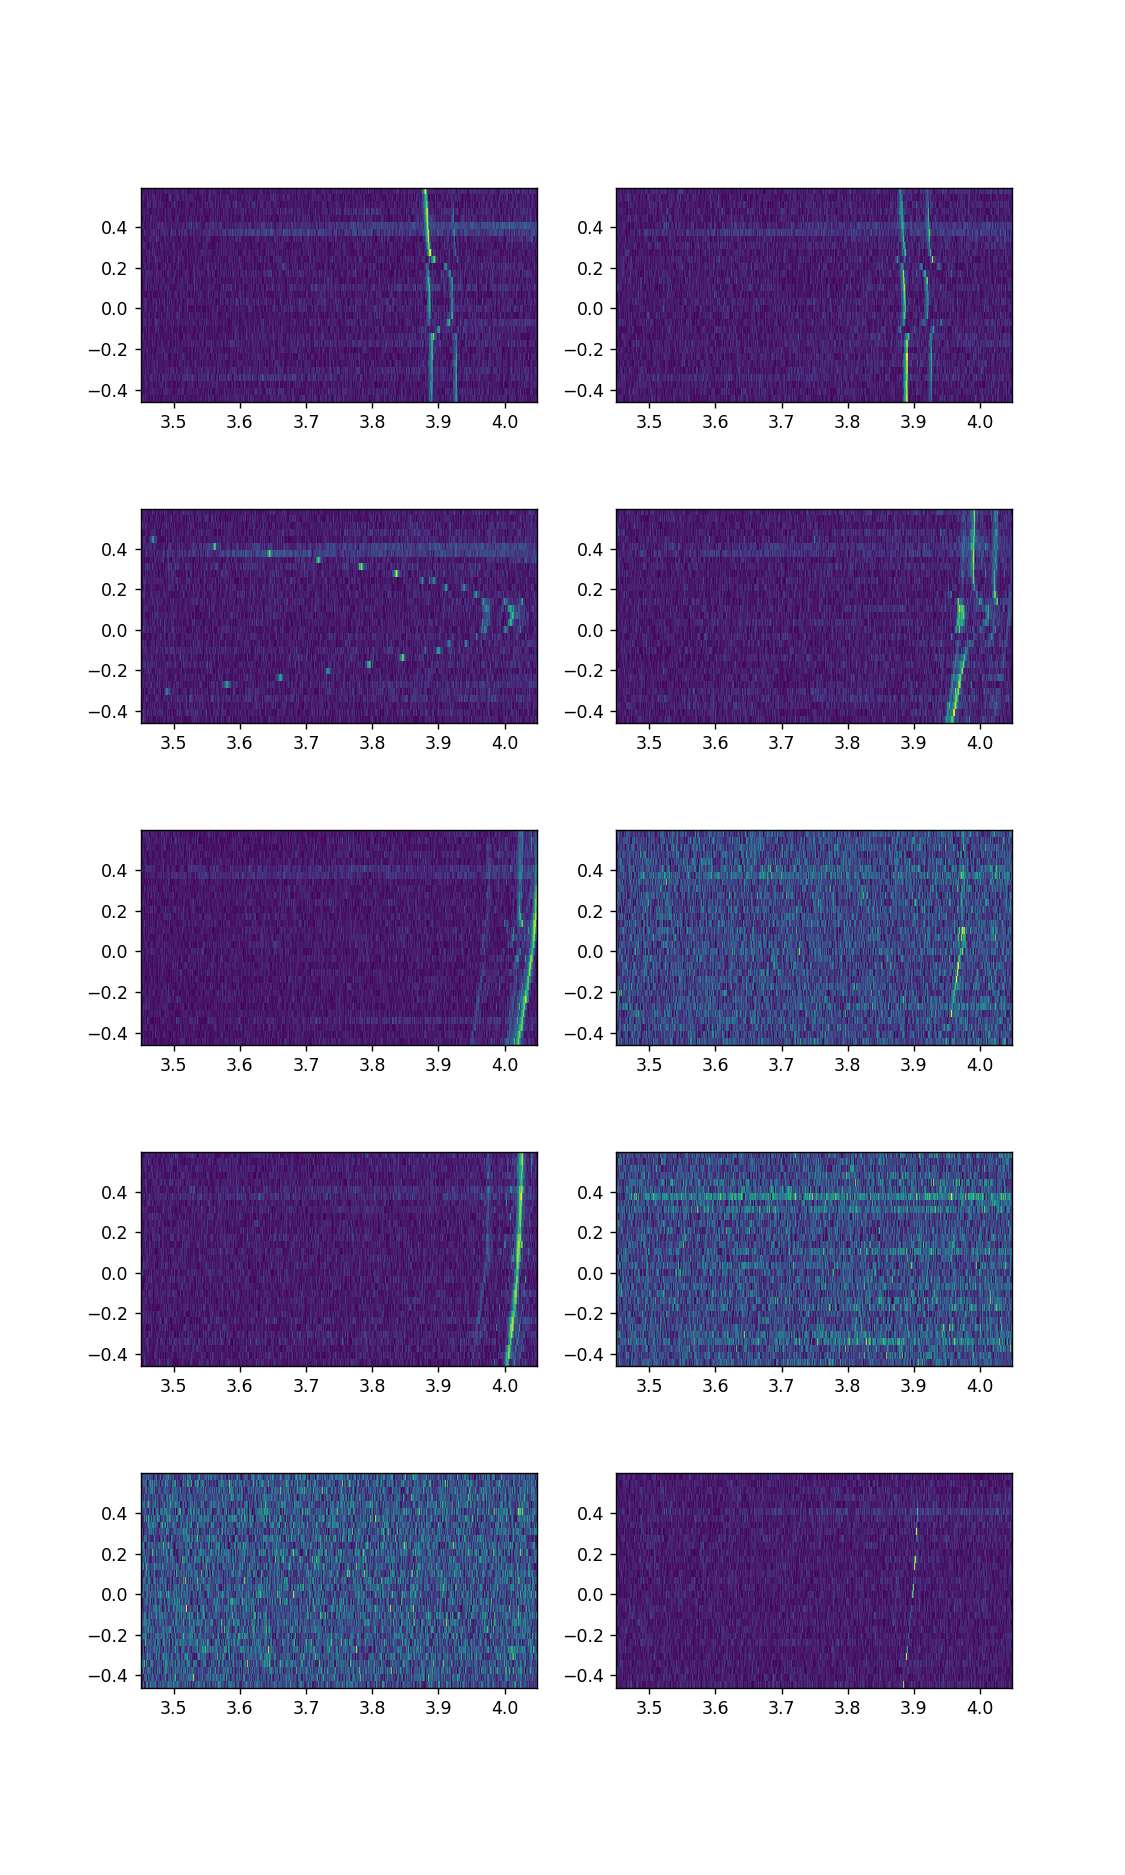

In [31]:
value,num,tags = write(height=3,title='spec2d',which=9,peak=1100)

In [166]:
target = 8
v, f, s = value[target-1][0], value[target-1][1]/1e9, value[target-1][2]
peak = (np.max(np.abs(s))+np.min(np.abs(s))) / 1.5
f,v,A, C, W, phi = op.Spec2d_Fit(peak=peak).fitSpec2d(v,f,s,classify=False)
v1 = np.linspace(min(v),max(v),1001)
z = A*np.cos(2*np.pi*W*v1+phi)+C
fig = plt.gcf()
ax = plt.getp(fig,'axes')
ax[target-1].scatter(f[1:-1],v[1:-1],marker='.',c='',edgecolors='m')
ax[target-1].plot(z[1:-1],v1[1:-1],'y--')
plt.show()

In [167]:
x = sy.Symbol('x',real=True)
y = A*sy.cos(2*sy.pi*W*x+phi)+C

In [168]:
q8 = q8._replace(specfunc=y)

In [169]:
q8.specfunc.evalf(subs={x:0.2})

3.83389228029792

In [147]:
q6

qubit(q_name='q6', inst={'dc': 'dc02', 'z_awg': 'awg131', 'z_ch': 6, 'ex_awg': 'awg132', 'ex_ch': [1, 2], 'ex_lo': 'psg_ex1', 'com': 'com4'}, T_bias=[1.806, -0.04], specfunc=-468.034978304297*cos(0.0377097699573441*pi*x + 3.14922970639208) - 464.051498525591, bias=-0.343, zpulse=None, f_lo=[6574000000.0], delta=array([50000000.]), f_ex=array([3.73e+09]), delta_ex=[0], power_ex=50, pi_len=None, T1=None)

# 拟合调制曲线找周期

In [12]:
n = 10
Tlist = {}
matrix_cross = np.zeros((n,n)) #收集crosstalk矩阵元
matrix_phi = np.zeros((n,n))

<IPython.core.display.Javascript object>


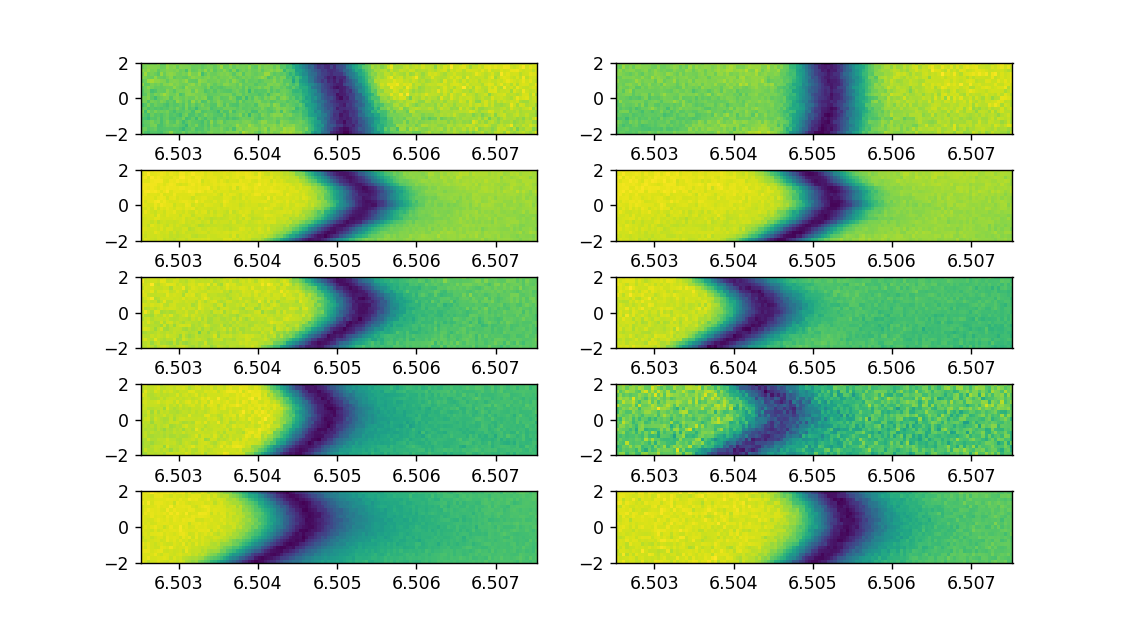

In [29]:
value,num,tags = write(height=1,title='S21vsFlux',which=7,peak=1000) #S21vsFlux_awgoffset

In [28]:
tags

['q4']

In [75]:
n_target = 1
mat = fit_cos(tag='q_%d'%n_target)
matrix_cross[:,n_target-1] = np.array(mat)[:,0]
matrix_phi[:,n_target-1] = np.array(mat)[:,1]
Tlist

{'q10': [2.063, 0.074],
 'q9': [1.72, -0.068],
 'q8': [1.686, -0.076],
 'q7': [1.795, -0.044],
 'q6': [1.806, -0.04],
 'q5': [1.795, 0.056],
 'q4': [1.761, 0.06],
 'q3': [1.759, 0.068],
 'q2': [1.77, 0.036],
 'q1': [2.021, 0.1]}

In [56]:
def fit_cos(tag):
    mat = []
    At = 0
    for i in range(len(value)):
        volt, freq, s = value[i]
        #volt, s = volt[3:-3], s[3:-3,:]
        x, y = op.RowToRipe().manipulation(volt,freq,s)
        A, C, W, phi = op.Cos_Fit().fitCos(x,y)
        T = 1 / W
        fig = plt.gcf() 
        axes = plt.getp(fig,'axes')
        axes[i].plot(y,x,'ro')
        x1 = np.linspace(min(volt),max(volt),1001)
        y1 = A*np.cos(2*np.pi/T*x1+phi)
        axes[i].plot(y1+C,x1,'b-')
        #if i != int(tag[2:]) - 1:
        t = symbols("t")
        z = A*sy.cos(2*np.pi/T*t+phi)+C
        z_diff = diff(z,t)
        if z_diff.evalf(subs = {t:0}) < 0:
            T *= -1
            if phi<0:
                phi *= -1
        phi = phi % (2*np.pi)
        mat.append((1/T,phi))
        if i == int(tag[2:]) - 1:
            bias0 = op.RowToRipe().firstMax(x1,y1,num=0)
            Tlist[tags[0]] = [round(np.abs(T),3),bias0]
        axes[i].set_title(r'$ q%d,T = %g,phi=%g $' %(i+7+1,T,phi))
    return mat
        

In [76]:
bit = [q1,q2,q3,q4,q5,q6,q7,q8,q9,q10]
for i, j in enumerate(bit):
    globals()['q%d'%(i+1)] = j._replace(T_bias=Tlist['q%d'%(i+1)])

# 拟合T1

<IPython.core.display.Javascript object>


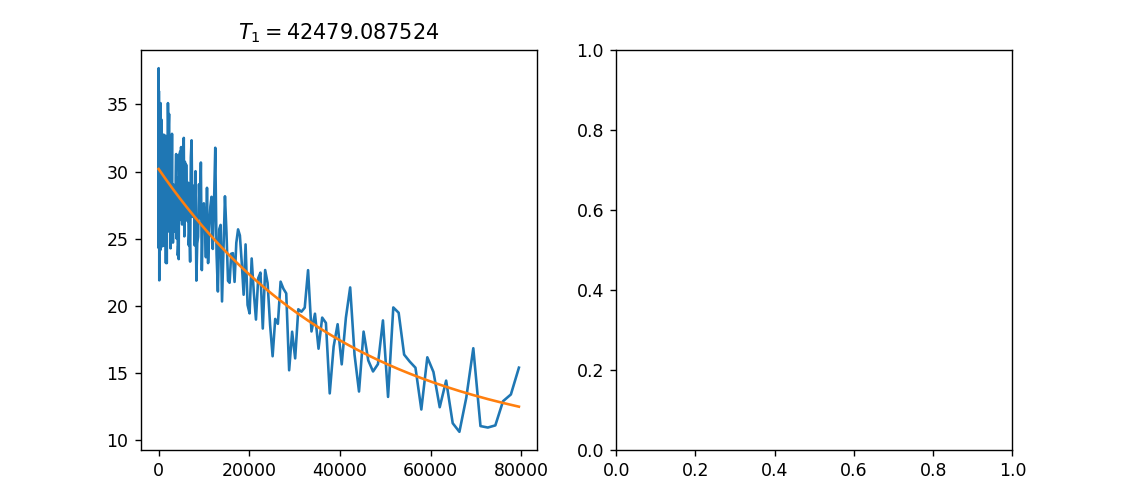

In [10]:
value,num,tags = write(height=4,title='T1',which=0)

In [11]:
x, y = value[0][0], value[0][1]
A, B, T1 = op.Exp_Fit().fitExp(x,np.abs(y))
z = A * np.exp(-x/T1) + B
fig = plt.gcf()
ax = plt.getp(fig,'axes')
ax[0].plot(x,z)
ax[0].set_title('$T_{1}=%f$'%T1)
plt.show()

# 拟合Rabi

<IPython.core.display.Javascript object>


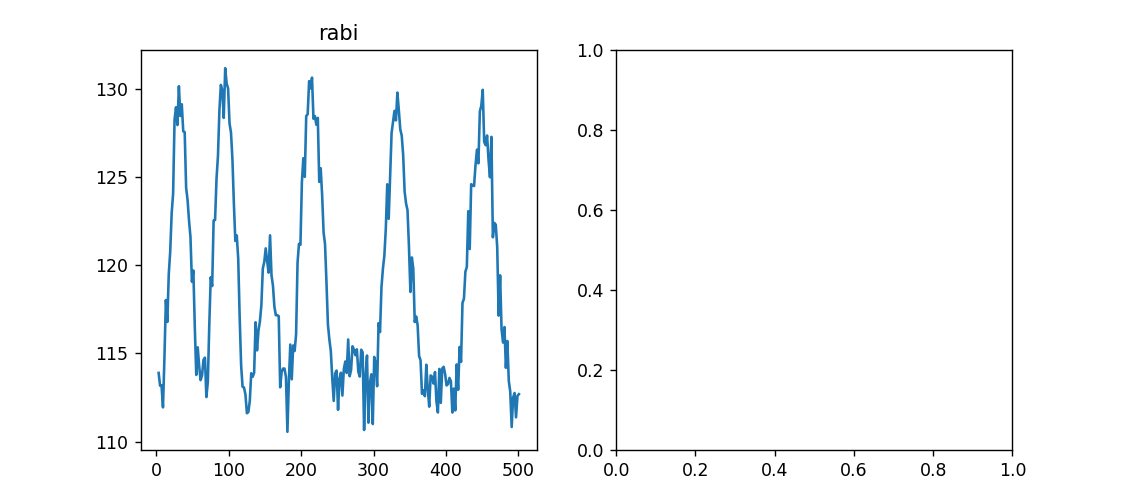

In [37]:
value,num,tags = write(height=4,title='rabi',which=0)

In [21]:
op.RowToRipe().firstMax(value[0][0],np.abs(value[0][1]),num=270)

163.0

In [22]:
fig = plt.gcf()
ax = plt.getp(fig,'axes')
for i in range(num):
    x, y  = value[i][0], value[i][1]
    A,B,T1,w,phi = op.Rabi_Fit(envelopemethod='hilbert').fitRabi(np.abs(x),np.abs(y))
    z = A*np.exp(-x/T1)*np.cos(2*np.pi*w*x+phi) + B
    ax[i].plot(x,z)
    ax[i].set_title('$T_{1}=%f,period=%f$'%(T1,1/w/2))
plt.show()

(14.080866727459266, 110.38764015435805, 20000, 0.012, 1.5707963267948966)


d:\qulab\qulab\optimize.py:276: RuntimeWarning: overflow encountered in exp
  return A*np.exp(-x/T1)*np.cos(2*np.pi*w*x+phi) + B - y


In [12]:
np.shape(x)

(500,)

# 拟合Ramsey及SpinEcho

<IPython.core.display.Javascript object>


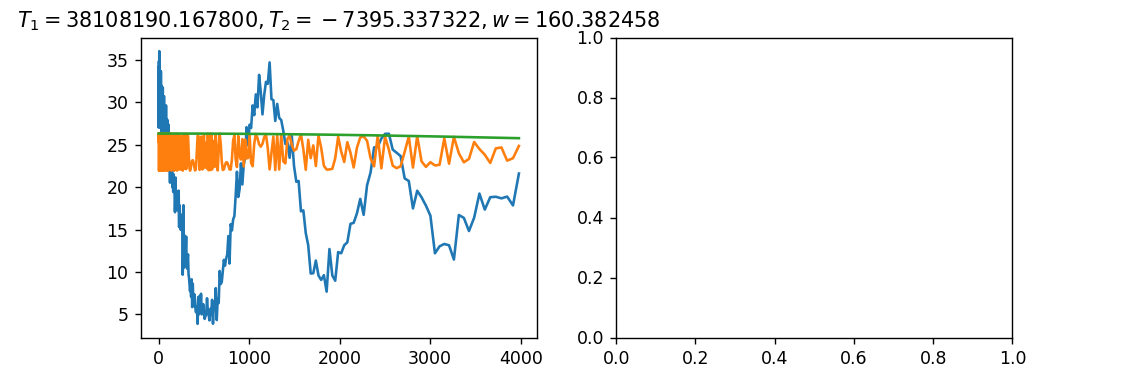

In [18]:
value,num,tags = write(height=3,title='Ramsey',which=0)

In [19]:
fig = plt.gcf()
ax = plt.getp(fig,'axes')
for i in range(num):
    x, y  = value[i][0], value[i][1]
    A,B,T1,T2,w,phi = op.T2_Fit(funcname='gauss',envelopemethod='hilbert').fitT2(x,np.abs(y))
    z = A*np.exp(-(x/T2)**2-x/T1/2)*np.cos(2*np.pi*w*x+phi) + B
    z_env = A*np.exp(-(x/T2)**2-x/T1/2) + B
    ax[i].plot(x,z)
    ax[i].plot(x,z_env)
    ax[i].set_title('$T_{1}=%f,T_{2}=%f,w=%f$'%(T1,T2,w*1e3))
plt.show()

(16.066491827287194, 39.0907137405095, 35000, 169.19621311732612, 0.0002507503044115786, 0)
